In [12]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy

import matplotlib.pyplot as plt #画图模块
import matplotlib.dates as mdates #日期格式处理模块
from matplotlib import style #用来自定义图表风格的模块

#magic command
%matplotlib inline
%config InlineBackend.figure_format='svg' #提高分辨率

from matplotlib.font_manager import FontProperties #画图自定义字体
from pylab import mpl #画图自定义字体
mpl.rcParams['font.sans-serif']=['SimHei'] #指定默认字体

In [3]:
#导入数据
data=pd.read_csv('E:/Python Github HW/ZhaoQy/000001-24.9.30.csv')
data['Day']=pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day',inplace=True)
data['Close']=pd.to_numeric(data['Close'],errors='coerce')
data['Preclose']=data['Close'].shift(1)  #实现数据平移，向下移动一行数据
data['Return']=(data['Close']-data['Preclose'])/data['Preclose']
data


,Preclose,Open,Highest,Lowest,Close,Volume,Money,Return
Day,,,,,,,,
1990-12-19,NaN,96.050,99.980,95.790,99.980,126000.00,4.940000e+05,NaN
1990-12-20,99.980,104.300,104.390,99.980,104.390,19700.00,8.400000e+04,0.044109
1990-12-21,104.390,109.070,109.130,103.730,109.130,2800.00,1.600000e+04,0.045407
1990-12-24,109.130,113.570,114.550,109.130,114.550,3200.00,3.100000e+04,0.049666
1990-12-25,114.550,120.090,120.250,114.550,120.250,1500.00,6.000000e+03,0.049760
...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131


In [13]:
data_new=data['1995-01':'2024-09'].copy()
data_new['Close']=pd.to_numeric(data_new['Close'])
data_new['Preclose']=pd.to_numeric(data_new['Preclose'])
#计算上证指数日收益率
data_new['Raw_return']=data_new['Close']/data_new['Preclose']-1
data_new

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Return,Raw_return
Day,,,,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,23451800.00,1.806930e+08,-0.012333,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,42222000.00,3.069230e+08,0.021770,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,43012300.00,3.015330e+08,-0.010584,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,48748200.00,3.537580e+08,-0.009476,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,50985100.00,3.985190e+08,-0.023035,-0.023035
...,...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131,0.036131


In [17]:
Month_data=data_new.resample('ME')['Raw_return'].apply(lambda x:(1+x).prod()-1).to_frame()
Month_data

,Raw_return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


# Data Filter数据节选

## 数据的缩尾/截尾

### 固定比率法

截尾：删除超过99%（95%）分位数的数据，删除小于1%（5%）分位数的数据
缩尾：把超过99%分位数的数据，替换成99%分位数；小于1%分位数的数据，替换成1%分位数

In [24]:
Month_data_fix=Month_data['1995-01':'2024-09'].copy() #copy（）深复制
Month_data_fix

,Raw_return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [20]:
#截尾
Month_data_fix=Month_data_fix[Month_data_fix['Raw_return']<Month_data_fix['Raw_return'].quantile(0.95)]
Month_data_fix=Month_data_fix[Month_data_fix['Raw_return']>Month_data_fix['Raw_return'].quantile(0.05)]
Month_data_fix


,Raw_return
Day,
1995-02-28,-0.023694
1995-04-30,-0.103552
1995-06-30,-0.099827
1995-07-31,0.103032
1995-08-31,0.040716
...,...
2024-04-30,0.020932
2024-05-31,-0.005801
2024-06-30,-0.038684


截尾、缩尾代码块需分开运行

In [25]:
#缩尾
Month_data_fix[Month_data_fix['Raw_return']>Month_data_fix['Raw_return'].quantile(0.99)]=Month_data_fix['Raw_return'].quantile(0.99)
Month_data_fix[Month_data_fix['Raw_return']<Month_data_fix['Raw_return'].quantile(0.01)]=Month_data_fix['Raw_return'].quantile(0.01)
Month_data_fix

,Raw_return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [26]:
Month_data['Raw_return'].describe().round(6)
Month_data_fix['Raw_return'].describe().round(6)

count    357.000000
mean       0.007104
std        0.073350
min       -0.202144
25%       -0.039178
50%        0.004296
75%        0.046311
max        0.215106
Name: Raw_return, dtype: float64

# 参数假设检验

In [27]:
#月收益率均值
np.mean(Month_data['2000-01':]['Raw_return'])

0.005529576142575528

C:\Users\ZhaoQY\AppData\Local\Temp\ipykernel_15044\2900026406.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".-r" (-> color='r'). The keyword argument will take precedence.
  ax.plot('Raw_return', #图片数据


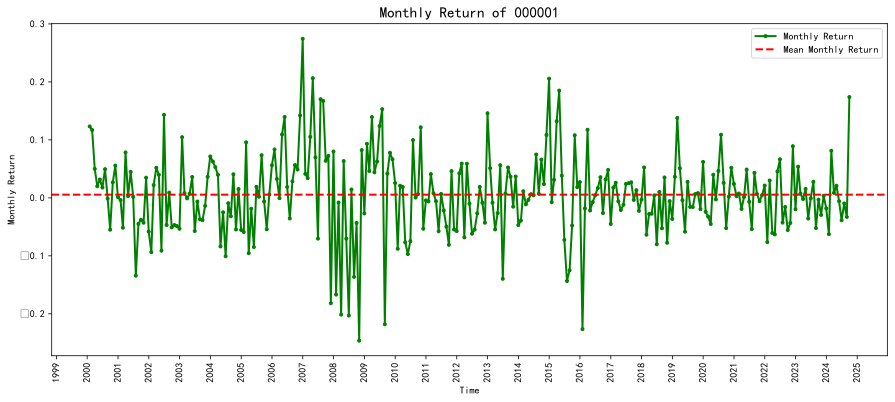

In [30]:
fig,ax=plt.subplots(figsize=(15,6))#选择图形大小

ax.plot('Raw_return', #图片数据
    '.-r',#图片类型，
    color='g',#图片颜色
    label='Monthly Return',#图片标签
    linewidth=2,#图片线宽
    data=Month_data['2000-01':])#图片数据来源
ax.set_title("Monthly Return of 000001",fontsize=15)
ax.set_xlabel('Time')
ax.set_ylabel('Monthly Return')

#添加直线
plt.axhline(y=np.mean(Month_data['2000-01':]['Raw_return']),color='r',linestyle='--',linewidth=2,
label='Mean Monthly Return')

#设置x轴的日期显示格式
data_format=mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator(1))

#转制x轴的日期显示格式
plt.xticks(rotation=90)

#添加图例
plt.legend(loc='upper right',fontsize=10)

plt.show();

投资组合Portfolio表现

$H_0:R=0$

$H_1:R\neq0$

统计学常用：T检验，主要用于比较两个样本均值的差异是否显著

In [31]:
stats.ttest_1samp(Month_data['2000-01':]['Raw_return'],0)

TtestResult(statistic=1.3453243676223154, pvalue=0.17955022276177804, df=296)

In [32]:
stats.ttest_1samp(Month_data['2000-01':'2005-06']['Raw_return'],0)

TtestResult(statistic=-0.2539547518729659, pvalue=0.8003321358536359, df=65)

In [33]:
len(Month_data['2000-01':'2005-06'])

66

我们希望拒绝上面的$H_0:R=0$,接受$R\neq 0$。

在统计结果里面，我们希望看到pvalue越小越好，即犯错概率越小越好，对应statistic（t值）越大越好